In [1]:
import pandas as pd
%pylab inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [2]:
#reading the titanic dataset from the disk
df = pd.read_csv("train.csv")

In [3]:
#all the columns from the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#inserting the variables into a new dataframe
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass'] = df['Pclass']
X['embarked'] = df['Embarked']
X['sibsp'] = df['SibSp']
X['parch'] = df['Parch']
X['survived'] = df['Survived']

In [5]:
#dropping the missing values
X = X.dropna(axis=0)

In [6]:
#removing dependent variable survived from X and assigining it to y
y = X['survived']
X = X.drop(['survived'], axis=1)

In [7]:
#implementing one hot encoding for the variable sex
X['sex'] = pd.get_dummies(X.sex)['female']

In [8]:
#removing the pclass variable 
X = X.drop(['pclass'], axis=1)

In [9]:
#implementing one hot encoding for the variable pclass
df_pclass = pd.get_dummies(df.Pclass, dummy_na=True, prefix='pclass')
df_pclass.drop(['pclass_nan'], axis=1, inplace=True)
X = pd.concat([X, df_pclass], join='inner', axis=1)
X

,sex,age,embarked,sibsp,parch,pclass_1.0,pclass_2.0,pclass_3.0
0,0.0,22.0,S,1,0,0.0,0.0,1.0
1,1.0,38.0,C,1,0,1.0,0.0,0.0
2,1.0,26.0,S,0,0,0.0,0.0,1.0
3,1.0,35.0,S,1,0,1.0,0.0,0.0
4,0.0,35.0,S,0,0,0.0,0.0,1.0
6,0.0,54.0,S,0,0,1.0,0.0,0.0
7,0.0,2.0,S,3,1,0.0,0.0,1.0
8,1.0,27.0,S,0,2,0.0,0.0,1.0
9,1.0,14.0,C,1,0,0.0,1.0,0.0
10,1.0,4.0,S,1,1,0.0,0.0,1.0


In [10]:
#removing the embarked variable 
X = X.drop(['embarked'], axis=1)

In [11]:
#implementing one hot encoding for the variable embarked
df_embarked = pd.get_dummies(df.Embarked, dummy_na=True, prefix='embarked')
df_embarked.drop(['embarked_nan'], axis=1, inplace=True)
X = pd.concat([X, df_embarked], join='inner', axis=1)
X

,sex,age,sibsp,parch,pclass_1.0,pclass_2.0,pclass_3.0,embarked_C,embarked_Q,embarked_S
0,0.0,22.0,1,0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1,0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,26.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,35.0,1,0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,35.0,0,0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,54.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
7,0.0,2.0,3,1,0.0,0.0,1.0,0.0,0.0,1.0
8,1.0,27.0,0,2,0.0,0.0,1.0,0.0,0.0,1.0
9,1.0,14.0,1,0,0.0,1.0,0.0,1.0,0.0,0.0
10,1.0,4.0,1,1,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
#scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
#building the testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#building logistic regression model
logmodel = LogisticRegression(penalty='l2', C=8)
logmodel.fit(X_train, y_train)

LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
print("Logistic model accuracy is %2.2f" % accuracy_score(y_test, logmodel.predict(X_test)))

Logistic model accuracy is 0.81


In [16]:
#measuring the AUC score and the classification report of the model
log_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
print("Logistic model AUC %2.2f" % log_roc_auc)
print(classification_report(y_test, logmodel.predict(X_test)))

Logistic model AUC 0.80
             precision    recall  f1-score   support

          0       0.78      0.91      0.84        80
          1       0.86      0.68      0.76        63

avg / total       0.82      0.81      0.81       143



In [17]:
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

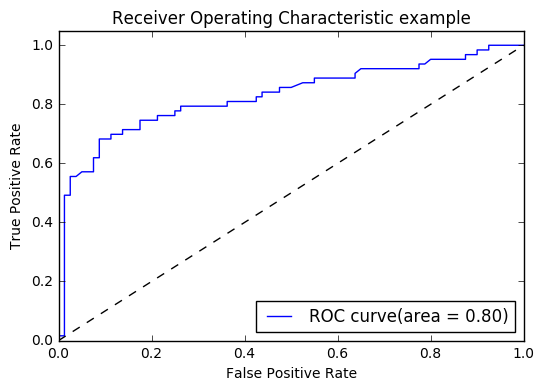

In [18]:
#plotting Receiver Operating Characteristic
plt.figure()
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' % log_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()